/home/mandeep/anaconda3/envs/p3/lib/python3.5/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



759.0


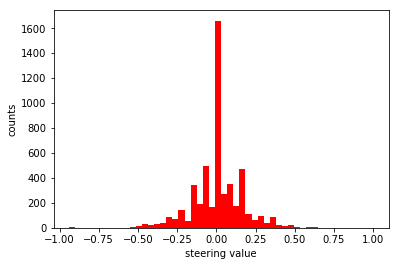

In [123]:
import matplotlib.pyplot as plt
import random 
import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import math

# Visualizations will be shown in the notebook.
%matplotlib inline

lines = []
center_angle = 0
centerAngleImgCount = 0
angleCol = np.zeros((10, 1000, 1))
rowCount = 0
scopeIndex = 0

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    for line in reader:
        if line[3] == 'steering':
            continue
        center_angle = round(float(line[3]), 2)
        if centerAngleImgCount > 1500 and center_angle == 0:
            continue
        elif center_angle == 0:
            centerAngleImgCount += 1
        
        lines.append(center_angle)
        
        if (center_angle >= .50 and center_angle <= .60):
            #count = 7
            scopeIndex = 0
            lastItemIndex = angleCol[0][0][0]
            angleCol[0] += 1
            angleCol[0][lastItemIndex] = random.uniform(.50, .60)
            angleCol[0][0][0] += 1
        elif (center_angle >= .30 and center_angle <= .40):
            #count = 5
            scopeIndex = 0
            angleCol[1] += 1
            
            lastItemIndex = angleCol[1][0][0]            
            angleCol[0][lastItemIndex] = random.uniform(.30, .40)
            angleCol[0][0][0] += 1
        elif (center_angle >= .20 and center_angle <= .30):
            #count = 4   
            scopeIndex = 0
            angleCol[2] += 1
            
            lastItemIndex = angleCol[0][0][0]            
            angleCol[0][lastItemIndex] = random.uniform(.20, .30)
            angleCol[0][0][0] += 1
        elif (center_angle >= .10 and center_angle <= .20):
            #count = 3
            scopeIndex = 0
            angleCol[3] += 1  
            
            lastItemIndex = angleCol[0][0][0]            
            angleCol[0][lastItemIndex] = random.uniform(.10, .20)
            angleCol[0][0][0] += 1
        elif (center_angle <= -.01 and center_angle >= -.10):
            #count = 3
            scopeIndex = 0
            angleCol[4] += 1
            
            lastItemIndex = angleCol[0][0][0]            
            angleCol[0][lastItemIndex] = random.uniform(-.01, -.10)
            angleCol[0][0][0] += 1
        elif (center_angle <= -.10 and center_angle >= -.25):
            #count = 6
            scopeIndex = 0
            angleCol[5] += 1
            
            lastItemIndex = angleCol[0][0][0]            
            angleCol[0][lastItemIndex] = random.uniform(-.10, -.25)
            angleCol[0][0][0] += 1
        elif (center_angle <= -.25 and center_angle >= -.35):
            #count = 8
            scopeIndex = 0
            angleCol[6] += 1
            
            lastItemIndex = angleCol[0][0][0]            
            angleCol[0][lastItemIndex] = random.uniform(-.25, -.35)
            angleCol[0][0][0] += 1
        elif (center_angle <= -.35 and center_angle >= -.45):
            #count = 10
            scopeIndex = 0
            angleCol[7] += 1
            
            lastItemIndex = angleCol[0][0][0]            
            angleCol[0][lastItemIndex] = random.uniform(-.35, -.45)
            angleCol[0][0][0] += 1
        
        #for x in range (0, count):
         #   lines.append(center_angle)

#skipping the headers
#lines = lines[1:]                     
n_angles = len(lines)
#print (lines)
#plt.hist(lines, n_angles)
#plt.show()
print ()
start = 0
stop = np.amax(angleCol[0::])
#print(angleCol[0::])
print (stop)
for i in range(len(angleCol)):
    start = angleCol[i]
    for j in (start, stop)
    

def print_train_labels():
    print()
    print("Samples distribution:")
    print("%-50s%-32s" % ("Label", "|Count"))
    histogram = np.histogram(lines, bins=np.arange(9000))
    for i in range(len(histogram[0])):
        print("%-50s|%-32d" % (lines[histogram[1][i]], histogram[0][i]))


#print_train_labels()
#lines = lines.reshape((lines.shape[0],)) 

    
#ax = pd.DataFrame({'X':lines, 'Y':lines}).plot()

plt.hist(lines, bins= 50, color= 'red')
plt.xlabel('steering value')
plt.ylabel('counts')

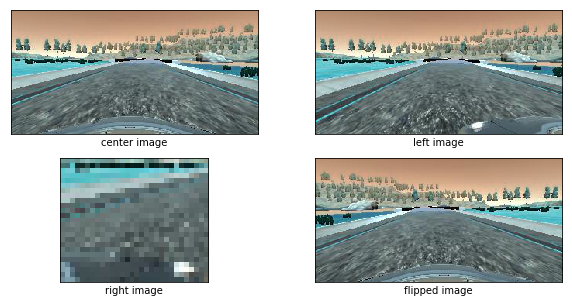

In [105]:
fileName1 = "./data/IMG/center_2016_12_01_13_32_45_275.jpg"
fileName2 = "./data/IMG/left_2016_12_01_13_32_45_275.jpg"
fileName3 = "./data/IMG/right_2016_12_01_13_32_45_275.jpg"

center_image = cv2.imread(fileName1)
left_image = cv2.imread(fileName2)
right_image = cv2.imread(fileName3)

flipped_image = np.fliplr(center_image)

right_image = cv2.resize(right_image, (80,40))
right_image = right_image[15:40, 0:80]


fig = plt.figure(figsize=(10,5))

axis = fig.add_subplot(2,2,1)
axis.set_xlabel('center image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(center_image)


axis = fig.add_subplot(2,2,2)
axis.set_xlabel('left image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(left_image)

axis = fig.add_subplot(2,2,3)
axis.set_xlabel('right image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(right_image)

axis = fig.add_subplot(2,2,4)
axis.set_xlabel('flipped image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(flipped_image)

